In [ ]:
import os
if not os.path.exists('srgan.pth.tar'):
    !pip install -q torch_snippets
    !wget -q https://raw.githubusercontent.com/sizhky/a-PyTorch-Tutorial-to-Super-Resolution/master/models.py -O models.py
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    downloaded = drive.CreateFile({'id': '1_PJ1Uimbr0xrPjE8U3Q_bG7XycGgsbVo'})
    downloaded.GetContentFile('srgan.pth.tar')
    from torch_snippets import *
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model = torch.load('srgan.pth.tar', map_location='cpu')['generator'].to(device)
model.eval()

/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:255: SyntaxWarning: "is" with a literal. Did you mean "=="?
  out_channels = (n_channels if i is 0 else in_channels * 2) if i % 2 is 0 else in_channels
/content/models.py:258: SyntaxWarning: "is" with a literal. Did you mean "=="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/content/models.py:258: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  stride=1 if i % 2 is 0 else 2, batch_norm=i is not 0, activation='LeakyReLu'))
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:1113: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the cha

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

# Download kaggle dataset
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Small dataset
!kaggle datasets download -d rajat95gupta/smartphone-image-denoising-dataset

# Medium dataset
#!kaggle datasets download -d soumikrakshit/smartphone-image-denoising-dataset

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 12.6G/12.6G [02:42<00:00, 102MB/s] 
100% 12.6G/12.6G [02:42<00:00, 83.2MB/s]


In [ ]:
# Unzip the smartphone denoising dataset
!unzip '/content/smartphone-image-denoising-dataset.zip'

Archive:  /content/smartphone-image-denoising-dataset.zip
  inflating: SIDD-val-lmdb/SIDD/val/gt_crops.lmdb/data.mdb  
  inflating: SIDD-val-lmdb/SIDD/val/gt_crops.lmdb/lock.mdb  
  inflating: SIDD-val-lmdb/SIDD/val/gt_crops.lmdb/meta_info.txt  
  inflating: SIDD-val-lmdb/SIDD/val/input_crops.lmdb/data.mdb  
  inflating: SIDD-val-lmdb/SIDD/val/input_crops.lmdb/lock.mdb  
  inflating: SIDD-val-lmdb/SIDD/val/input_crops.lmdb/meta_info.txt  
  inflating: train/train/0001_001_S6_00100_00060_3200_L/0001_GT_SRGB_010.PNG  
  inflating: train/train/0001_001_S6_00100_00060_3200_L/0001_GT_SRGB_011.PNG  
  inflating: train/train/0001_001_S6_00100_00060_3200_L/0001_NOISY_SRGB_010.PNG  
  inflating: train/train/0001_001_S6_00100_00060_3200_L/0001_NOISY_SRGB_011.PNG  
  inflating: train/train/0002_001_S6_00100_00020_3200_N/0002_GT_SRGB_010.PNG  
  inflating: train/train/0002_001_S6_00100_00020_3200_N/0002_GT_SRGB_011.PNG  
  inflating: train/train/0002_001_S6_00100_00020_3200_N/0002_NOISY_SRGB_010.P

In [ ]:
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

In [ ]:
image = readPIL('/content/train/train/0001_001_S6_00100_00060_3200_L/0001_NOISY_SRGB_011.PNG')
image.size
# (260,181)
image = image.resize((130,90))
im = preprocess(image)

In [ ]:
sr = model(im[None])[0]
sr = postprocess(sr)

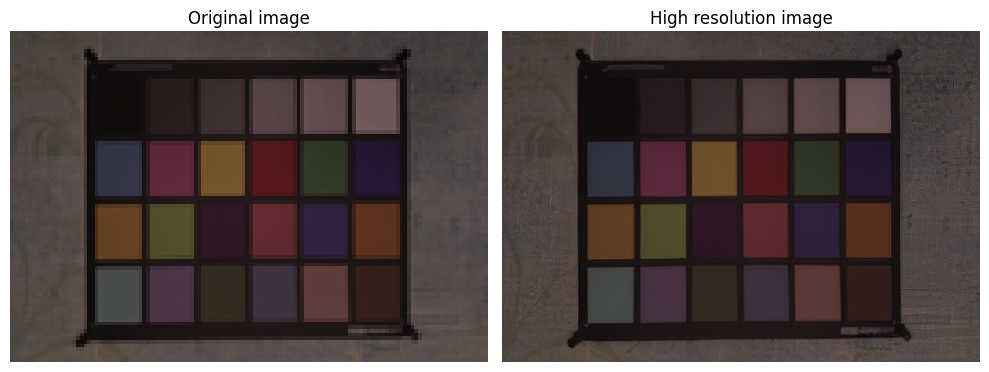

In [ ]:
subplots([image, sr], nc=2, figsize=(10,10), titles=['Original image','High resolution image'])

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch_snippets import *
from models import Generator, Discriminator

# Define preprocess and postprocess transforms
preprocess = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    T.Lambda(lambda x: x.to(device))
])

postprocess = T.Compose([
    T.Lambda(lambda x: (x.cpu().detach()+1)/2),
    T.ToPILImage()
])

# Define the SRGAN model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Generator().to(device)
model.eval()

# Function to load image pairs from a folder
def load_image_pairs(folder):
    gt_images = []
    noisy_images = []
    for root, _, files in os.walk(folder):
        for file in files:
            if 'GT' in file and '011' in file:
                gt_images.append(os.path.join(root, file))
            elif 'NOISY' in file and '011' in file:
                noisy_images.append(os.path.join(root, file))
    return gt_images, noisy_images

# Function to load and preprocess images
def load_images(gt_images, noisy_images):
    images = []
    for gt_img, noisy_img in zip(gt_images, noisy_images):
        gt_image = preprocess(readPIL(gt_img))
        noisy_image = preprocess(readPIL(noisy_img))
        images.append((gt_image, noisy_image))
    return images

# Define the training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for gt_image, noisy_image in train_loader:
            gt_image = gt_image.to(device)
            noisy_image = noisy_image.to(device)
            optimizer.zero_grad()
            sr_image = model(noisy_image)
            loss = criterion(sr_image, gt_image)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * noisy_image.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# Function to compute PSNR
def compute_psnr(sr_image, gt_image):
    mse = nn.MSELoss()(sr_image, gt_image)
    psnr = 20 * torch.log10(1.0 / torch.sqrt(mse))
    return psnr.item()

# Function to compute SSIM
def compute_ssim(sr_image, gt_image):
    ssim_val = ssim(sr_image, gt_image, data_range=1.0, win_size=11, win_sigma=1.5, k1=0.01, k2=0.03)
    return ssim_val.item()

# Function to compute FID
def compute_fid(sr_images, gt_images):
    fid_score = calculate_fid(sr_images, gt_images)
    return fid_score

In [ ]:
# Main function to load data, train model, and compute metrics
def main(train_folder, num_epochs=5):
    # Load image pairs
    gt_images, noisy_images = load_image_pairs(train_folder)

    # Load and preprocess images
    images = load_images(gt_images, noisy_images)

    # Split data into train and validation sets
    train_set = images[:int(len(images)*0.8)]
    val_set = images[int(len(images)*0.8):]

    # Create data loaders
    train_loader = DataLoader(train_set, batch_size=8, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=1)

    # Define loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

    # Compute metrics on validation set
    sr_images = []
    gt_images = []
    for gt_image, noisy_image in val_loader:
        gt_image = gt_image.to(device)
        noisy_image = noisy_image.to(device)
        sr_image = model(noisy_image)
        sr_images.append(sr_image)
        gt_images.append(gt_image)

    # Compute and print metrics
    psnr = compute_psnr(torch.cat(sr_images), torch.cat(gt_images))
    ssim = compute_ssim(torch.cat(sr_images), torch.cat(gt_images))
    fid = compute_fid(torch.cat(sr_images), torch.cat(gt_images))
    print(f'PSNR: {psnr:.2f}, SSIM: {ssim:.4f}, FID: {fid:.4f}')

In [ ]:
# Define variables
train_folder = '/content/train/train'  # Path to the folder containing image pairs
num_epochs = 2

# Call the main function
main(train_folder, num_epochs)